In [7]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from src import utils


pd.set_option('display.float_format', '{:,.0f}'.format)

ticker = input(f"Enter ticker: ").upper()
period = input(f"Enter period: ")
stock = yf.Ticker(ticker)
history = stock.history(period=period)

Enter ticker:  baba
Enter period:  5y


/Users/ivankyulev/Projects/Notebooks/.venv/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


In [8]:
history.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,"1,259","1,259","1,259","1,259","1,259","1,259","1,259"
mean,156,158,154,156,"20,498,773",0,0
std,65,65,64,65,"13,082,473",0,0
min,62,63,57,62,"5,523,000",0,0
25%,91,93,89,91,"13,249,150",0,0
50%,163,165,161,163,"17,577,000",0,0
75%,208,211,207,209,"23,361,850",0,0
max,309,315,305,313,"159,834,300",1,0


In [9]:
stock.cash_flow

,2023-03-31,2022-03-31,2021-03-31,2020-03-31
Free Cash Flow,"165,400,000,000","89,435,000,000","188,601,000,000","135,221,000,000"
Repurchase Of Capital Stock,"-74,746,000,000","-61,225,000,000","-773,000,000",0
Repayment Of Debt,"-11,448,000,000","-16,713,000,000","-7,061,000,000","-31,741,000,000"
Issuance Of Debt,"22,790,000,000","9,427,000,000","38,410,000,000","15,719,000,000"
Issuance Of Capital Stock,"11,000,000","109,000,000","175,000,000","91,506,000,000"
...,...,...,...,...
Earnings Losses From Equity Investments,"8,063,000,000","-14,344,000,000","-6,984,000,000","-65,828,000,000"
Gain Loss On Investment Securities,"14,911,000,000","20,481,000,000","-66,689,000,000","2,901,000,000"
Gain Loss On Sale Of PPE,"-163,000,000","132,000,000","75,000,000","-24,000,000"
Gain Loss On Sale Of Business,"58,000,000","-1,131,000,000","-1,027,000,000","-10,043,000,000"


In [16]:
stock.financials

,2023-03-31,2022-03-31,2021-03-31,2020-03-31
Tax Effect Of Unusual Items,"-461,380,000","-6,285,250,000",0,"-71,071,511"
Tax Rate For Calcs,0,0,0,0
Normalized EBITDA,"155,826,000,000","153,367,000,000","217,963,000,000","214,828,000,000"
Total Unusual Items,"-2,714,000,000","-25,141,000,000",0,"-576,000,000"
Total Unusual Items Excluding Goodwill,"-2,714,000,000","-25,141,000,000",0,"-576,000,000"
Net Income From Continuing Operation Net Minority Interest,"72,783,000,000","62,249,000,000","150,578,000,000","149,433,000,000"
Reconciled Depreciation,"46,938,000,000","48,065,000,000","47,909,000,000","42,427,000,000"
Reconciled Cost Of Revenue,"516,261,000,000","503,032,000,000","385,723,000,000","253,328,000,000"
EBITDA,"153,112,000,000","128,226,000,000","217,963,000,000","214,252,000,000"
EBIT,"106,174,000,000","80,161,000,000","170,054,000,000","171,825,000,000"


In [15]:
history

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-02-18 00:00:00+00:00,413,413,407,408,26304047,0,0
2019-02-19 00:00:00+00:00,408,411,406,407,21942024,0,0
2019-02-20 00:00:00+00:00,408,410,406,409,26642665,0,0
2019-02-21 00:00:00+00:00,408,409,404,409,29371636,0,0
2019-02-22 00:00:00+00:00,407,412,406,407,23537934,0,0
...,...,...,...,...,...,...,...
2024-02-12 00:00:00+00:00,469,475,467,472,34478010,0,0
2024-02-13 00:00:00+00:00,473,480,470,472,64524012,0,0
2024-02-14 00:00:00+00:00,473,477,468,469,83053311,0,0


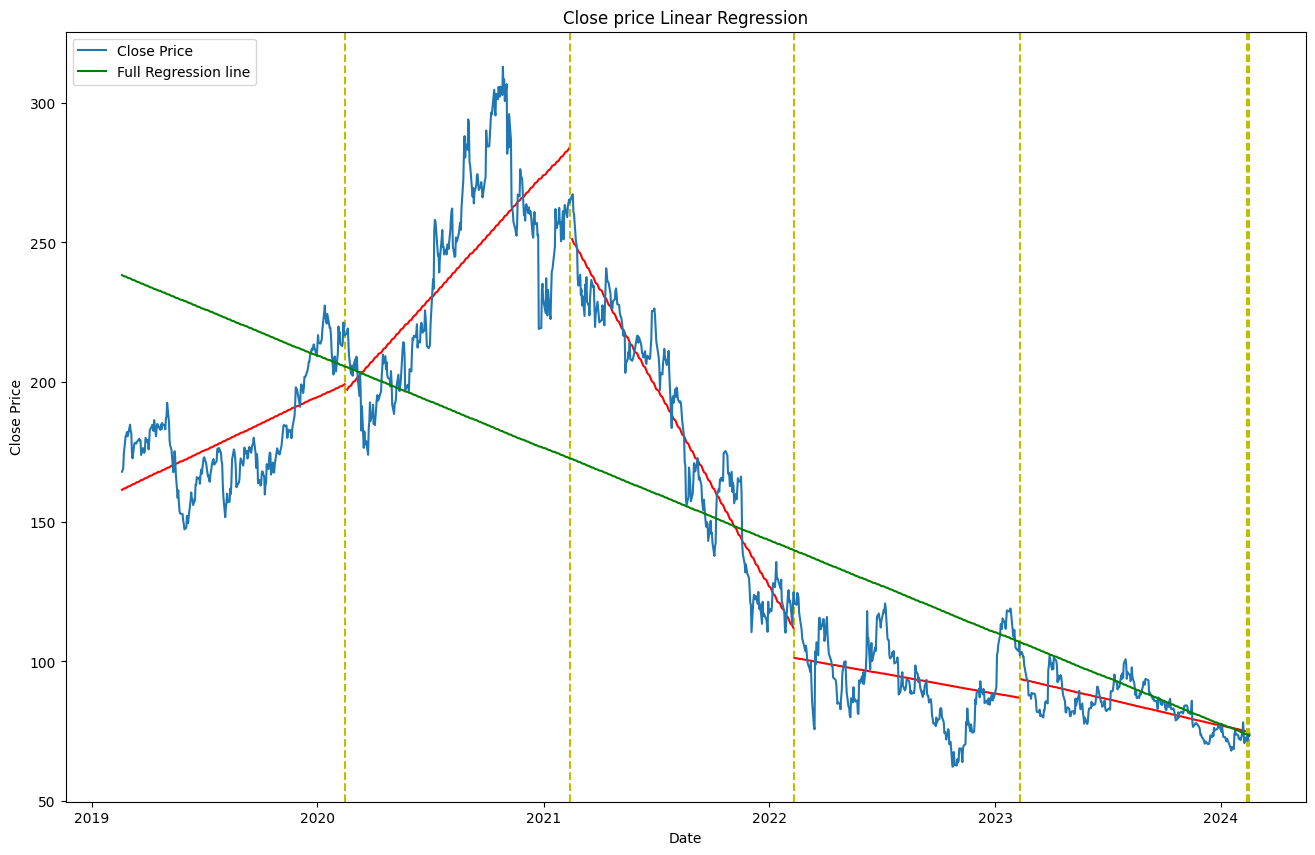

In [17]:
utils.regression_price_chart(history, reg_line_count=5)

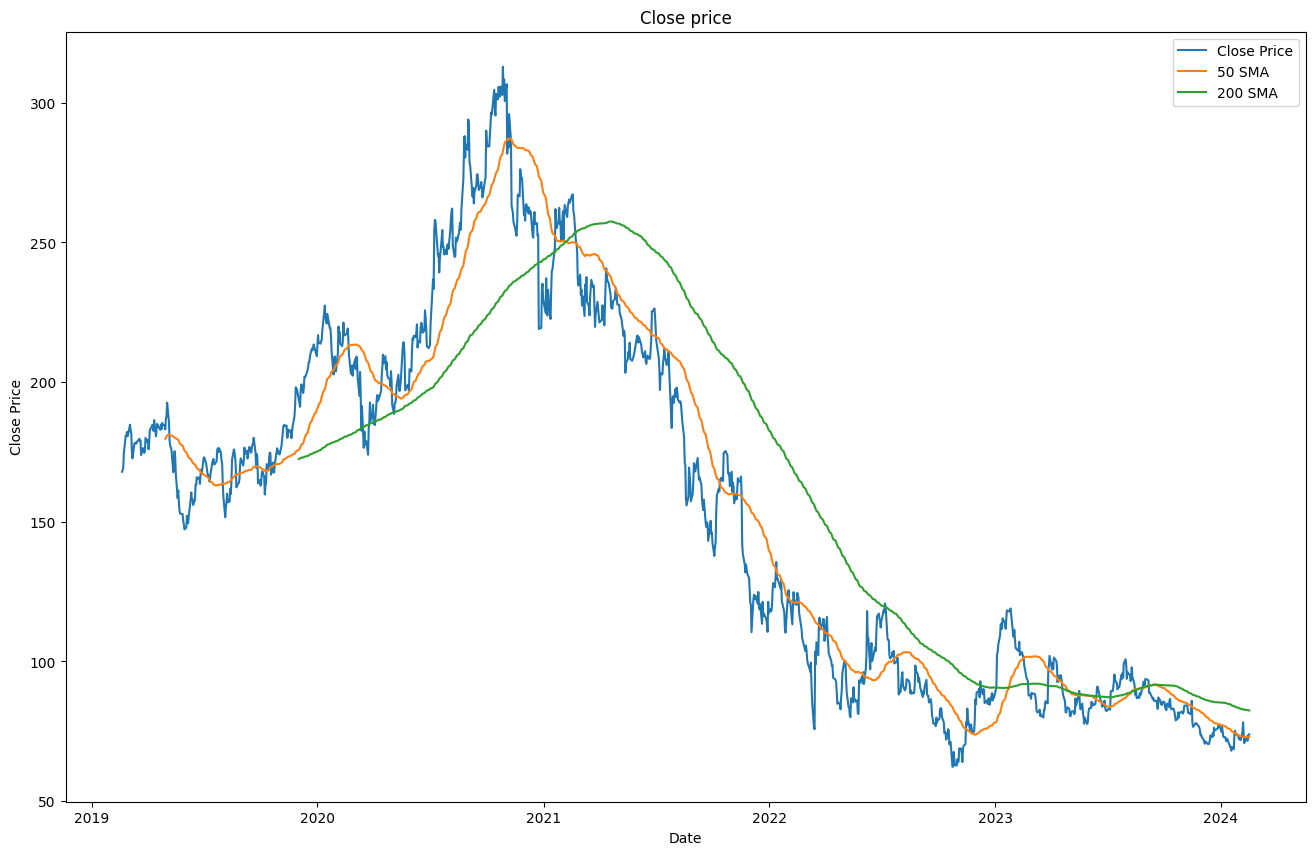

In [18]:
utils.simple_moving_average(history, [50, 200])